In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 깨지는거 안깨지게 해주는 명령어? 한 번만 하면 된다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tensorflow import keras

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
cd /content/drive/MyDrive/코랩으로 한 번 해보자/22-01-05 프로젝트/입력 변수

In [ ]:
df = pd.read_csv('데이터 입출력 포함.csv', encoding = 'CP949')

In [ ]:
df.info()

In [ ]:
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

df['다우존스'] = df['다우존스'].apply(lambda x : float(x.split()[0].replace(',','')))
df['나스닥'] = df['나스닥'].apply(lambda x : float(x.split()[0].replace(',','')))
df['코스피'] = df['코스피'].apply(lambda x : float(x.split()[0].replace(',','')))
# 천 단위 넘어가서 1,000 이런식으로 나오는 건 문자열 처리로 되서 이 함수로 float 형식으로 바꿔준다

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

Text(0, 0.5, 'price')

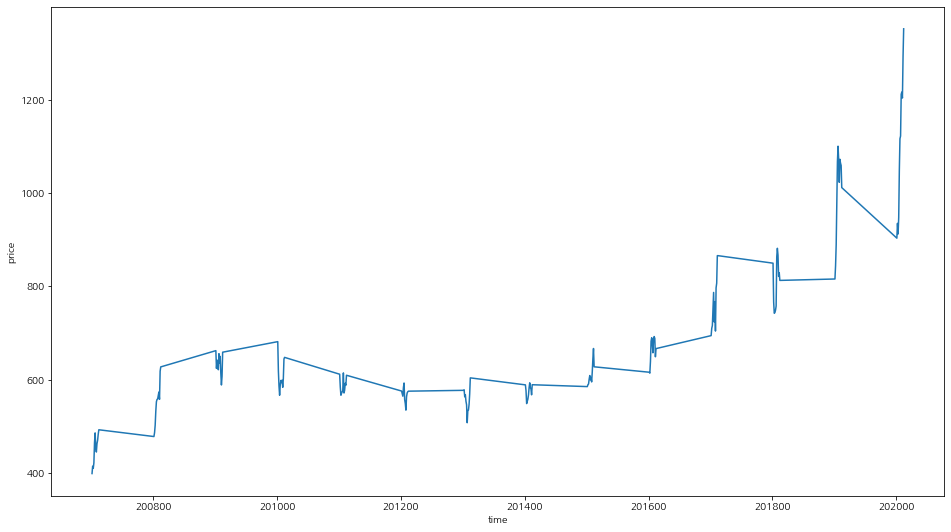

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['실거래가'], x=df['날짜'])
plt.xlabel('time')
plt.ylabel('price')

# 시각화 해서 이제까지 실거래가 시각화

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('실거래가', 1), df['실거래가'])

In [ ]:
x_train.shape, x_test.shape

((126, 9), (42, 9))

In [ ]:
x_train.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['날짜', '실거래가', '아파트거래현황', '다우존스', '동행종합지수 (2015=100)', '생산자물가', '나스닥', '소비자물가', '지가변동률', '코스피']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

# 스케일이 완료

array([[0.00000000e+00, 0.00000000e+00, 2.22890733e-01, ...,
        0.00000000e+00, 9.39024390e-01, 1.64158989e-01],
       [7.62776506e-04, 1.65827036e-02, 1.79529737e-01, ...,
        1.77609901e-02, 9.26125704e-01, 1.95703807e-01],
       [1.52555301e-03, 1.18597817e-02, 2.97372061e-01, ...,
        3.55621635e-02, 9.12054409e-01, 2.15152118e-01],
       ...,
       [9.98474447e-01, 8.44353484e-01, 2.22544952e-01, ...,
        9.81113879e-01, 9.05722326e-01, 6.65097987e-01],
       [9.99237223e-01, 9.37552477e-01, 3.59889350e-01, ...,
        9.77497388e-01, 9.12757974e-01, 8.44164954e-01],
       [1.00000000e+00, 1.00000000e+00, 4.41355463e-01, ...,
        9.82721209e-01, 9.20262664e-01, 1.00000000e+00]])

In [ ]:
df2 = pd.DataFrame(scaled, columns = scale_cols)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop('실거래가', 1), df2['실거래가'])

In [ ]:
x_train.shape, x_test.shape

((126, 9), (42, 9))

In [ ]:
x_train.head()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs=-1)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

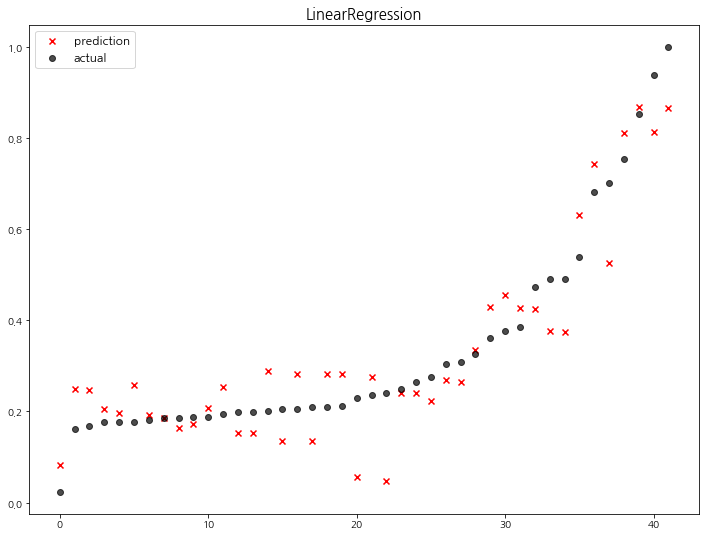

              model       mse
0  LinearRegression  0.006298


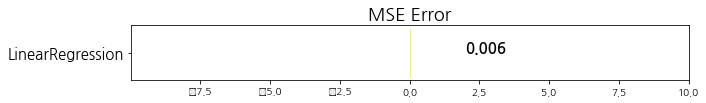

In [ ]:
mse_eval('LinearRegression', pred, y_test)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

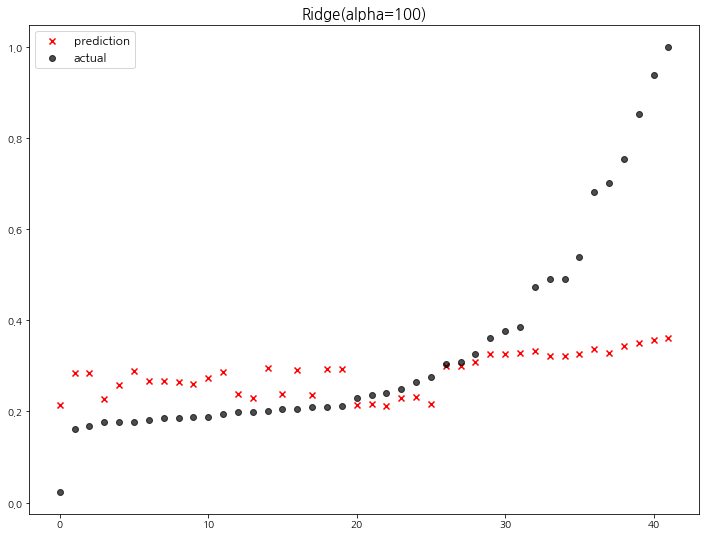

              model       mse
0  Ridge(alpha=100)  0.040959
1  LinearRegression  0.006298


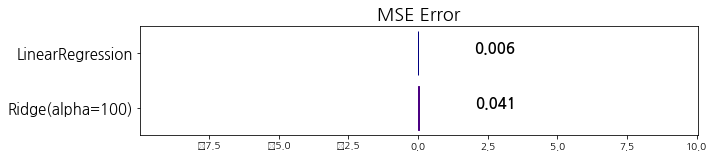

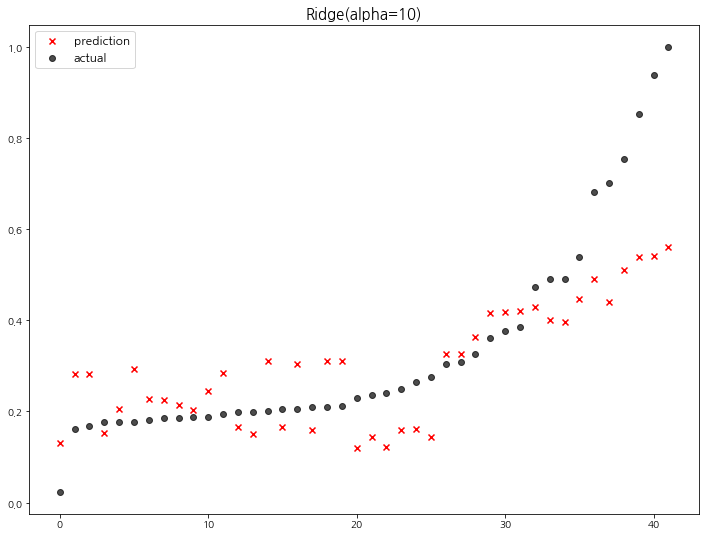

              model       mse
0  Ridge(alpha=100)  0.040959
1   Ridge(alpha=10)  0.019958
2  LinearRegression  0.006298


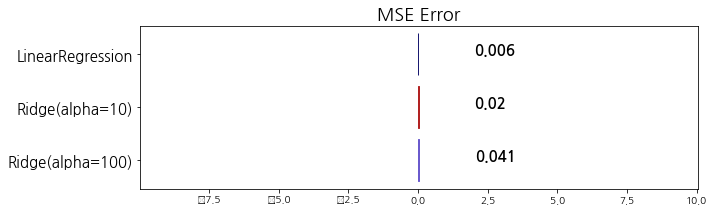

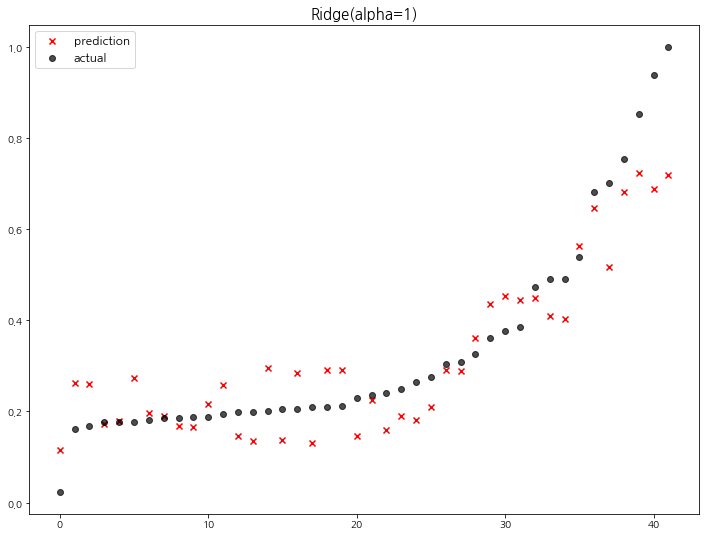

              model       mse
0  Ridge(alpha=100)  0.040959
1   Ridge(alpha=10)  0.019958
2    Ridge(alpha=1)  0.008240
3  LinearRegression  0.006298


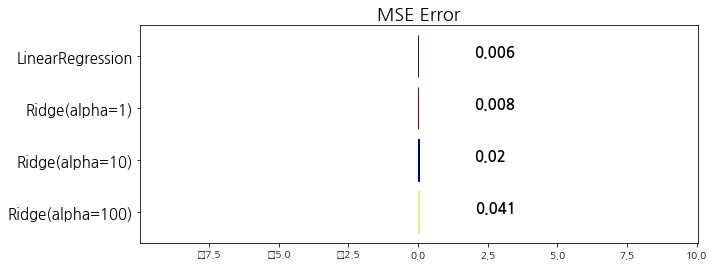

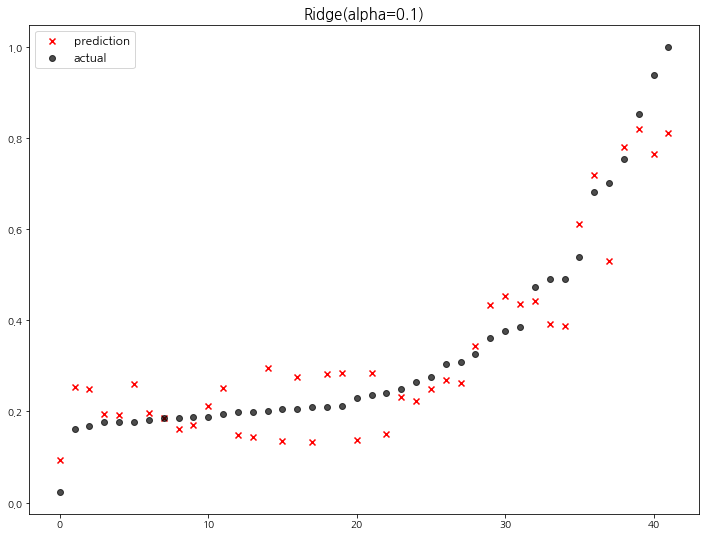

              model       mse
0  Ridge(alpha=100)  0.040959
1   Ridge(alpha=10)  0.019958
2    Ridge(alpha=1)  0.008240
3  LinearRegression  0.006298
4  Ridge(alpha=0.1)  0.005619


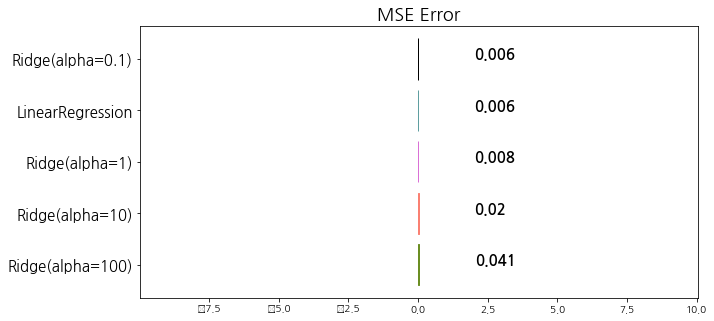

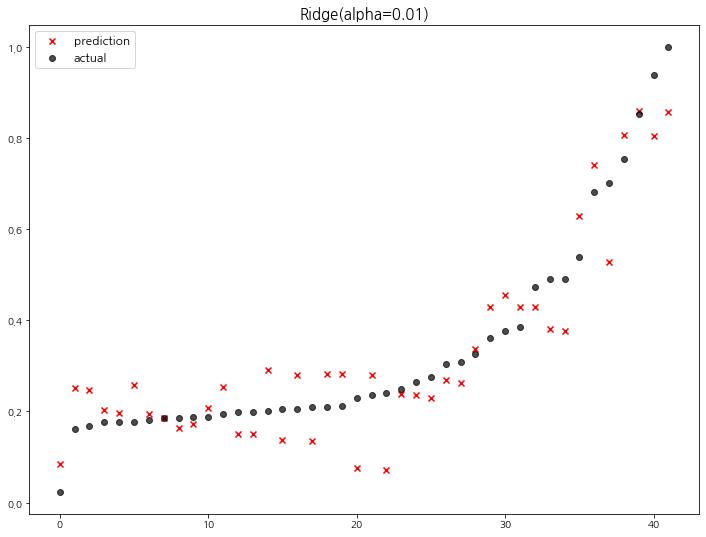

               model       mse
0   Ridge(alpha=100)  0.040959
1    Ridge(alpha=10)  0.019958
2     Ridge(alpha=1)  0.008240
3   LinearRegression  0.006298
4  Ridge(alpha=0.01)  0.005994
5   Ridge(alpha=0.1)  0.005619


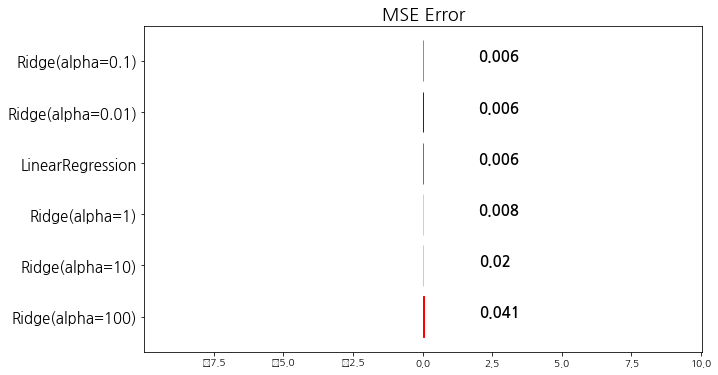

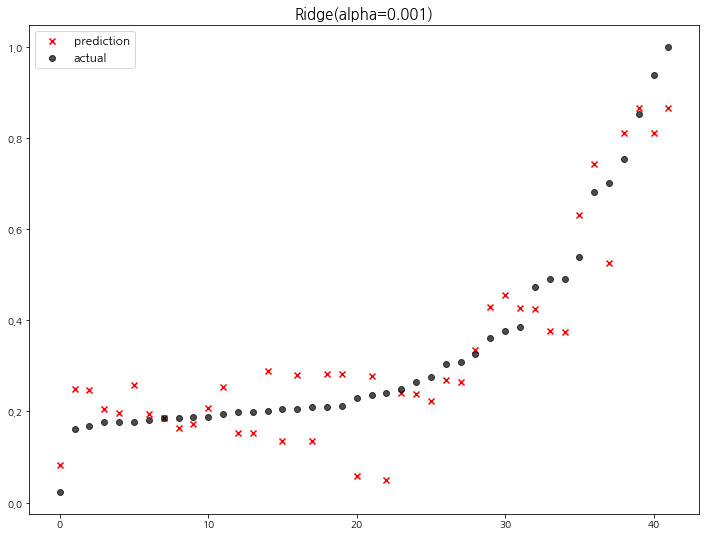

                model       mse
0    Ridge(alpha=100)  0.040959
1     Ridge(alpha=10)  0.019958
2      Ridge(alpha=1)  0.008240
3    LinearRegression  0.006298
4  Ridge(alpha=0.001)  0.006260
5   Ridge(alpha=0.01)  0.005994
6    Ridge(alpha=0.1)  0.005619


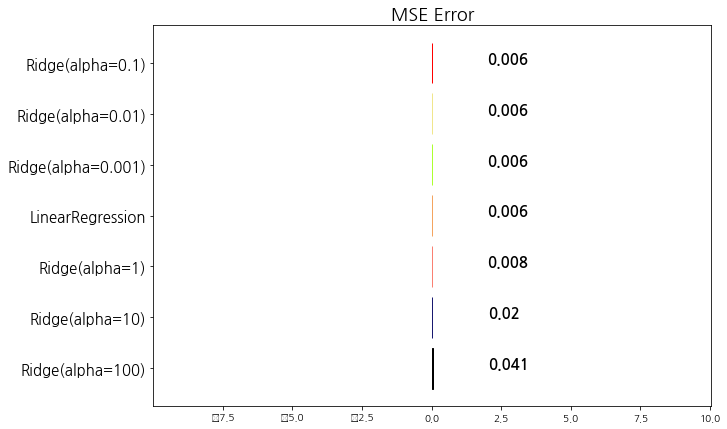

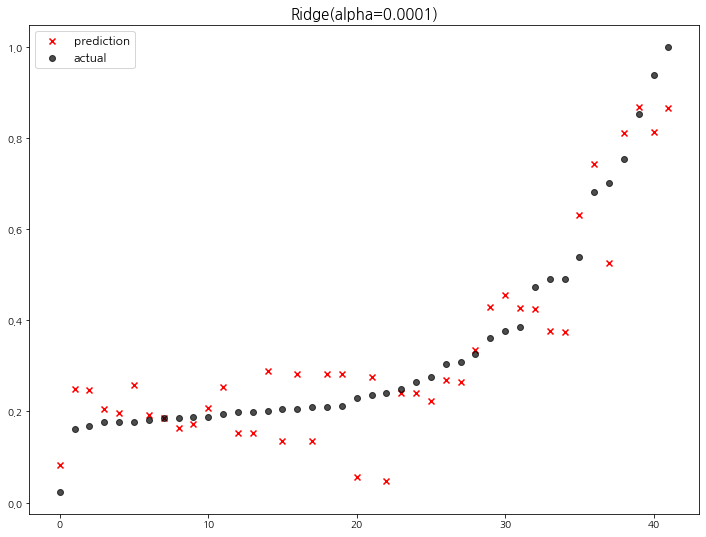

                 model       mse
0     Ridge(alpha=100)  0.040959
1      Ridge(alpha=10)  0.019958
2       Ridge(alpha=1)  0.008240
3     LinearRegression  0.006298
4  Ridge(alpha=0.0001)  0.006294
5   Ridge(alpha=0.001)  0.006260
6    Ridge(alpha=0.01)  0.005994
7     Ridge(alpha=0.1)  0.005619


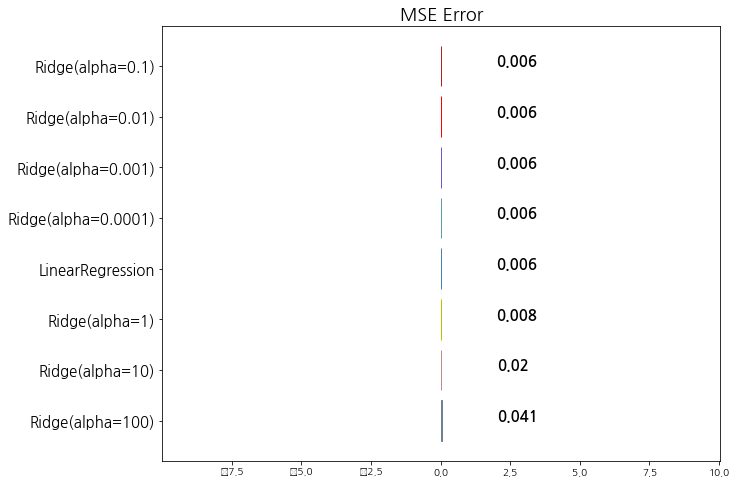

In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [ ]:
x_train.columns

Index(['날짜', '아파트거래현황', '다우존스', '동행종합지수 (2015=100)', '생산자물가', '나스닥', '소비자물가',
       '지가변동률', '코스피'],
      dtype='object')

In [ ]:
ridge.coef_

array([ 0.25398735,  0.01260484, -0.14786708, -0.43800999,  0.31899453,
        0.64133587,  0.03232439, -0.0570151 ,  0.05663664])

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

In [ ]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

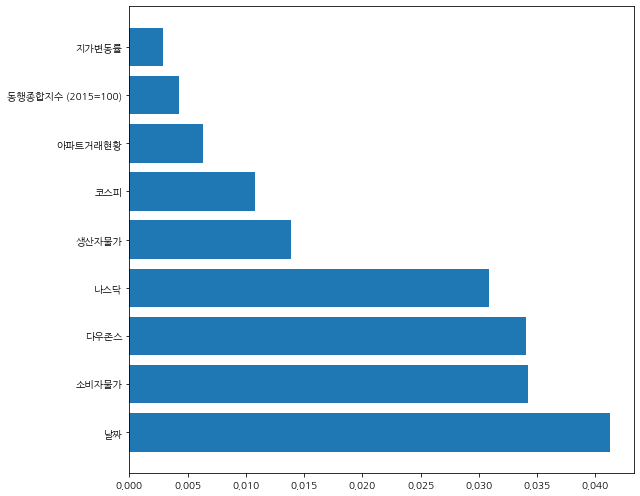

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

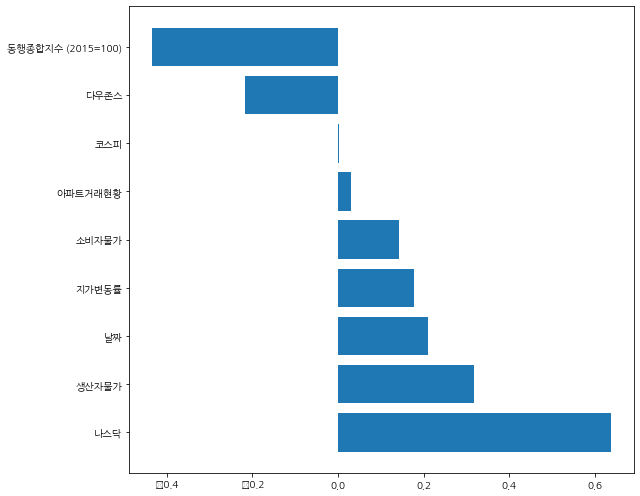

In [ ]:
plot_coef(x_train.columns, ridge_001.coef_)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

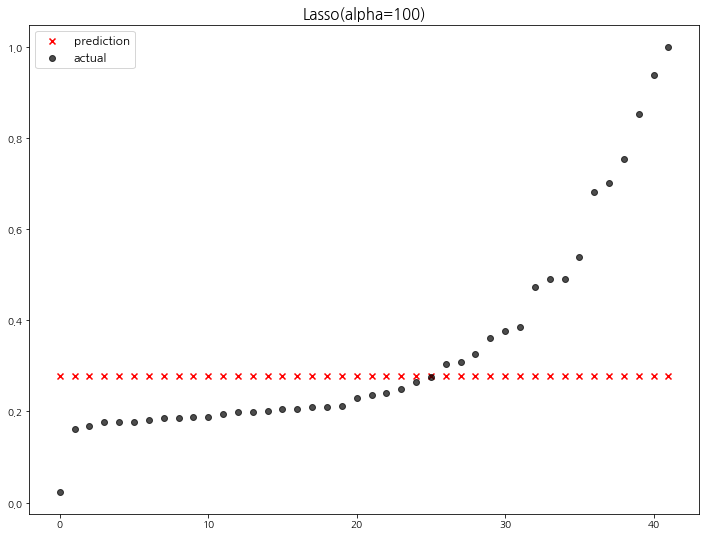

                 model       mse
0     Lasso(alpha=100)  0.054877
1     Ridge(alpha=100)  0.040959
2      Ridge(alpha=10)  0.019958
3       Ridge(alpha=1)  0.008240
4     LinearRegression  0.006298
5  Ridge(alpha=0.0001)  0.006294
6   Ridge(alpha=0.001)  0.006260
7    Ridge(alpha=0.01)  0.005994
8     Ridge(alpha=0.1)  0.005619


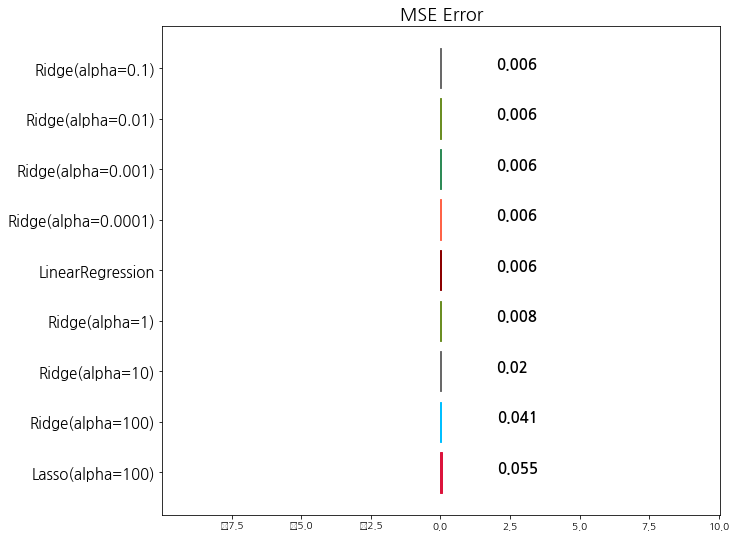

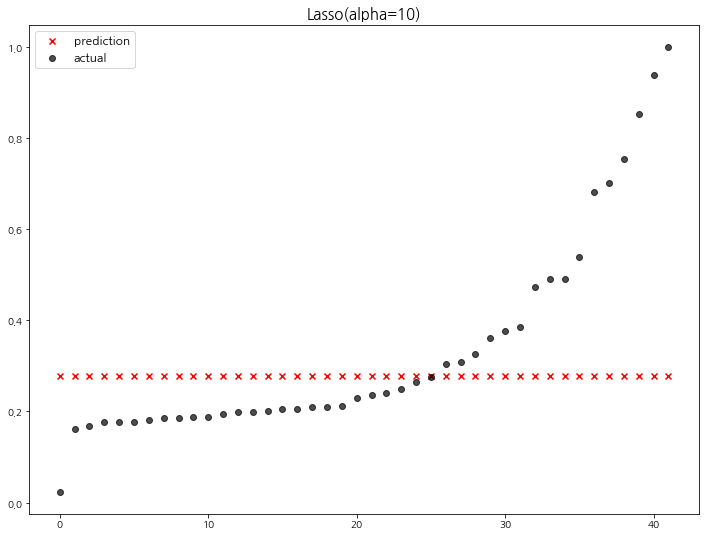

                 model       mse
0     Lasso(alpha=100)  0.054877
1      Lasso(alpha=10)  0.054877
2     Ridge(alpha=100)  0.040959
3      Ridge(alpha=10)  0.019958
4       Ridge(alpha=1)  0.008240
5     LinearRegression  0.006298
6  Ridge(alpha=0.0001)  0.006294
7   Ridge(alpha=0.001)  0.006260
8    Ridge(alpha=0.01)  0.005994
9     Ridge(alpha=0.1)  0.005619


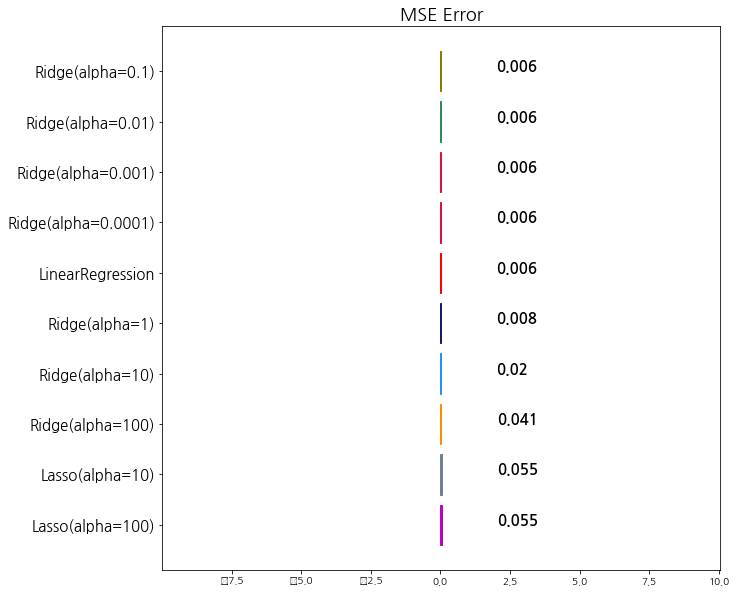

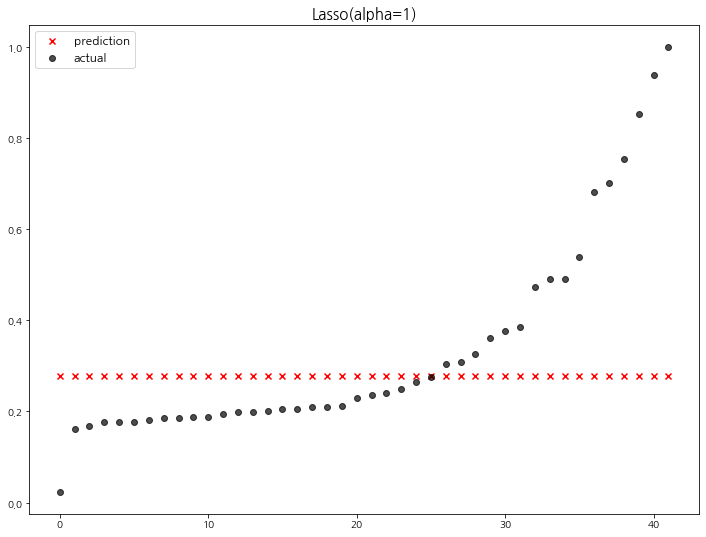

                  model       mse
0      Lasso(alpha=100)  0.054877
1       Lasso(alpha=10)  0.054877
2        Lasso(alpha=1)  0.054877
3      Ridge(alpha=100)  0.040959
4       Ridge(alpha=10)  0.019958
5        Ridge(alpha=1)  0.008240
6      LinearRegression  0.006298
7   Ridge(alpha=0.0001)  0.006294
8    Ridge(alpha=0.001)  0.006260
9     Ridge(alpha=0.01)  0.005994
10     Ridge(alpha=0.1)  0.005619


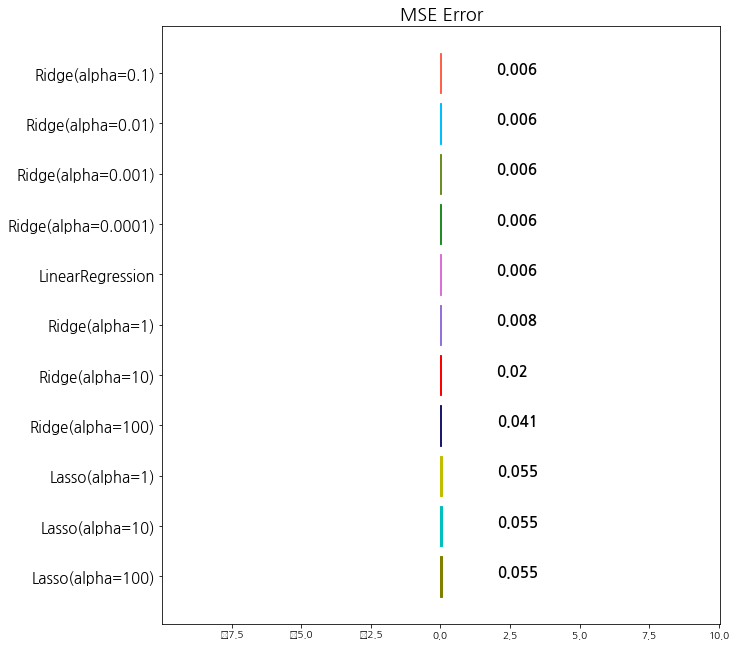

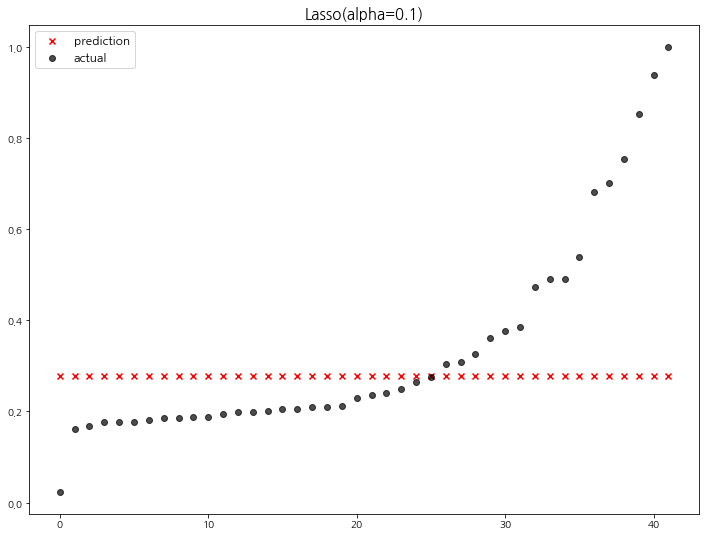

                  model       mse
0      Lasso(alpha=100)  0.054877
1       Lasso(alpha=10)  0.054877
2        Lasso(alpha=1)  0.054877
3      Lasso(alpha=0.1)  0.054877
4      Ridge(alpha=100)  0.040959
5       Ridge(alpha=10)  0.019958
6        Ridge(alpha=1)  0.008240
7      LinearRegression  0.006298
8   Ridge(alpha=0.0001)  0.006294
9    Ridge(alpha=0.001)  0.006260
10    Ridge(alpha=0.01)  0.005994
11     Ridge(alpha=0.1)  0.005619


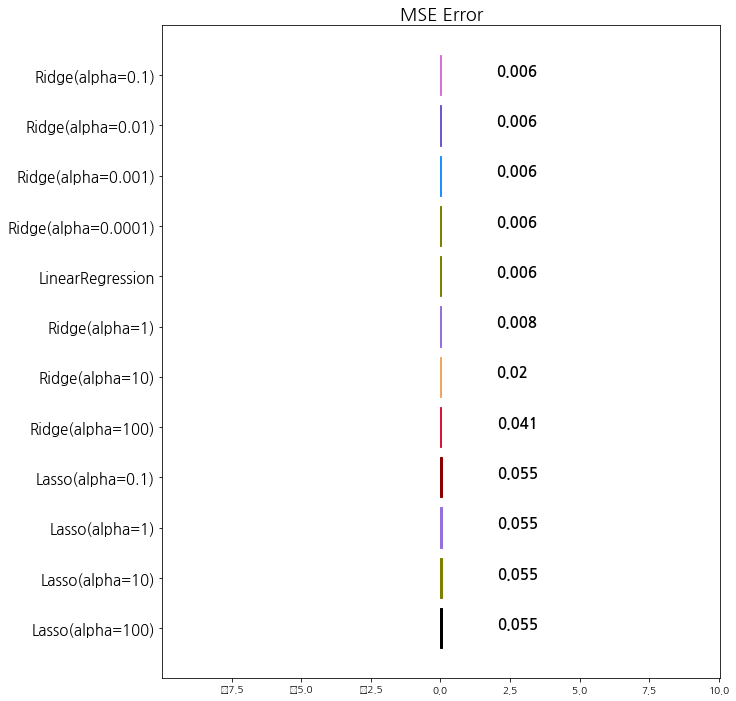

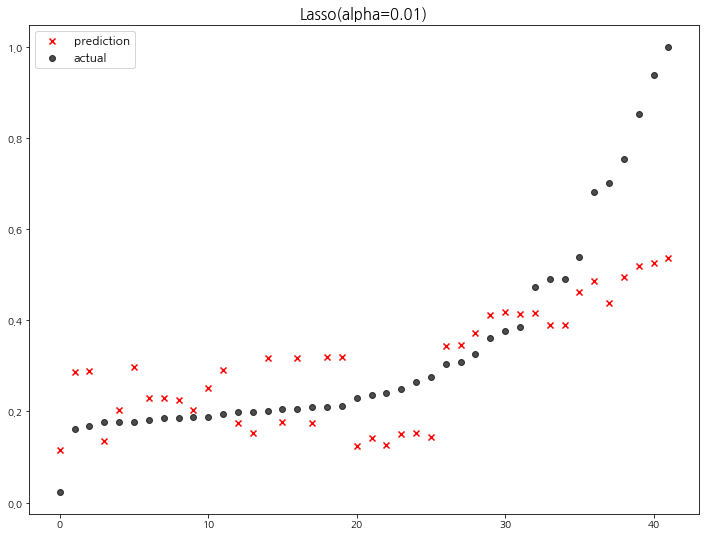

                  model       mse
0      Lasso(alpha=100)  0.054877
1       Lasso(alpha=10)  0.054877
2        Lasso(alpha=1)  0.054877
3      Lasso(alpha=0.1)  0.054877
4      Ridge(alpha=100)  0.040959
5     Lasso(alpha=0.01)  0.021683
6       Ridge(alpha=10)  0.019958
7        Ridge(alpha=1)  0.008240
8      LinearRegression  0.006298
9   Ridge(alpha=0.0001)  0.006294
10   Ridge(alpha=0.001)  0.006260
11    Ridge(alpha=0.01)  0.005994
12     Ridge(alpha=0.1)  0.005619


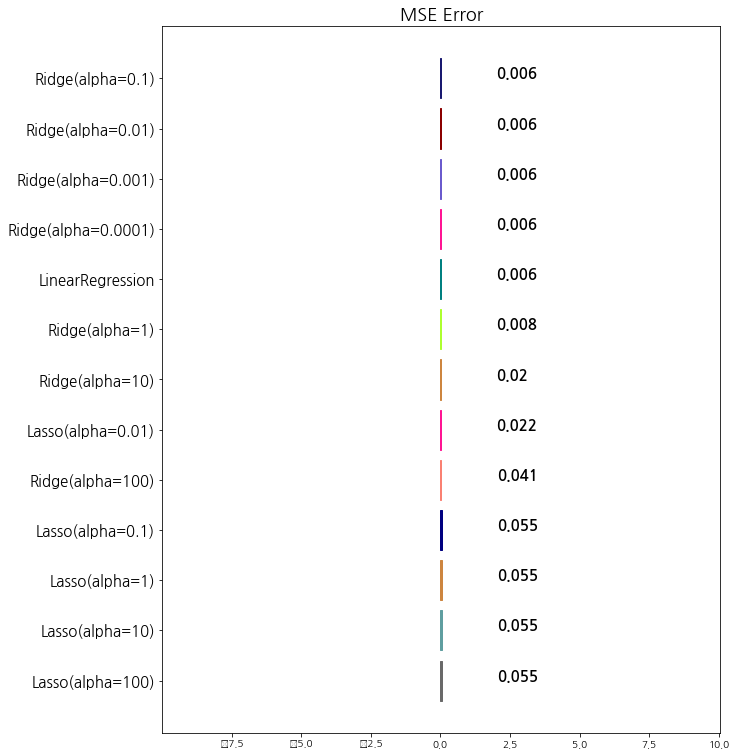

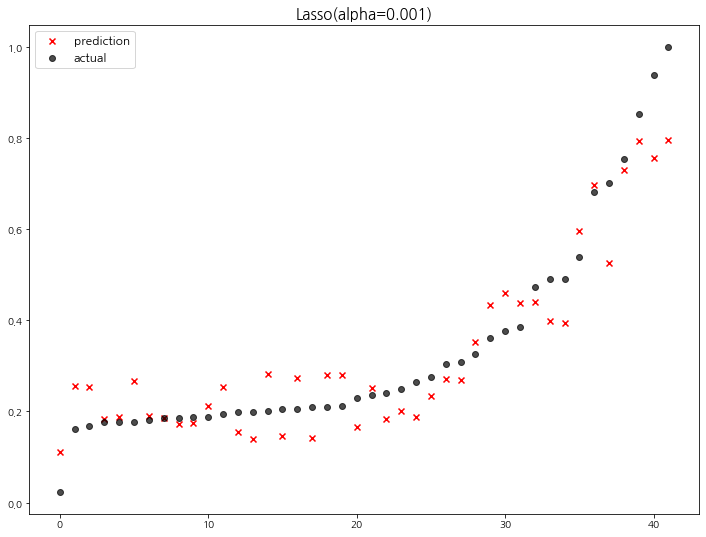

                  model       mse
0      Lasso(alpha=100)  0.054877
1       Lasso(alpha=10)  0.054877
2        Lasso(alpha=1)  0.054877
3      Lasso(alpha=0.1)  0.054877
4      Ridge(alpha=100)  0.040959
5     Lasso(alpha=0.01)  0.021683
6       Ridge(alpha=10)  0.019958
7        Ridge(alpha=1)  0.008240
8      LinearRegression  0.006298
9   Ridge(alpha=0.0001)  0.006294
10   Ridge(alpha=0.001)  0.006260
11    Ridge(alpha=0.01)  0.005994
12   Lasso(alpha=0.001)  0.005685
13     Ridge(alpha=0.1)  0.005619


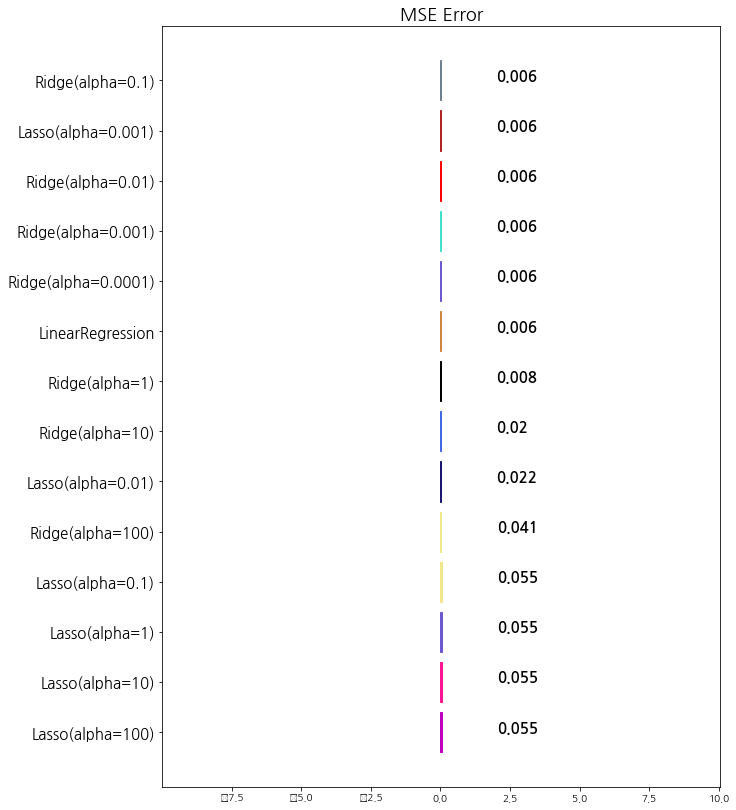

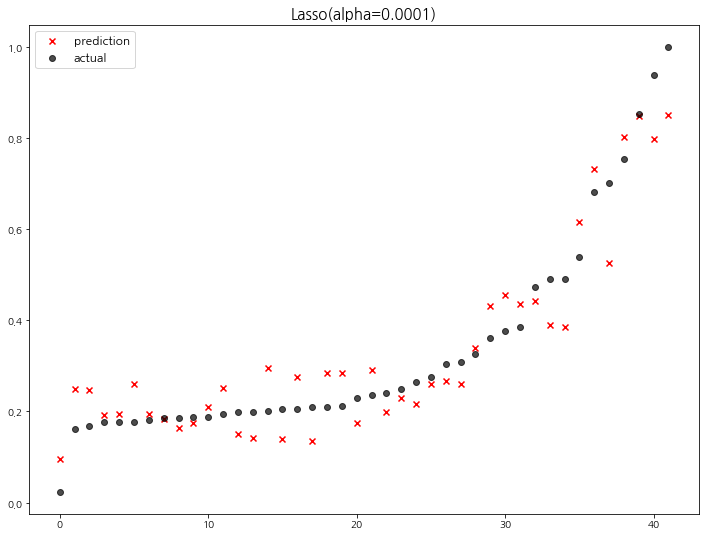

                  model       mse
0      Lasso(alpha=100)  0.054877
1       Lasso(alpha=10)  0.054877
2        Lasso(alpha=1)  0.054877
3      Lasso(alpha=0.1)  0.054877
4      Ridge(alpha=100)  0.040959
5     Lasso(alpha=0.01)  0.021683
6       Ridge(alpha=10)  0.019958
7        Ridge(alpha=1)  0.008240
8      LinearRegression  0.006298
9   Ridge(alpha=0.0001)  0.006294
10   Ridge(alpha=0.001)  0.006260
11    Ridge(alpha=0.01)  0.005994
12   Lasso(alpha=0.001)  0.005685
13     Ridge(alpha=0.1)  0.005619
14  Lasso(alpha=0.0001)  0.004860


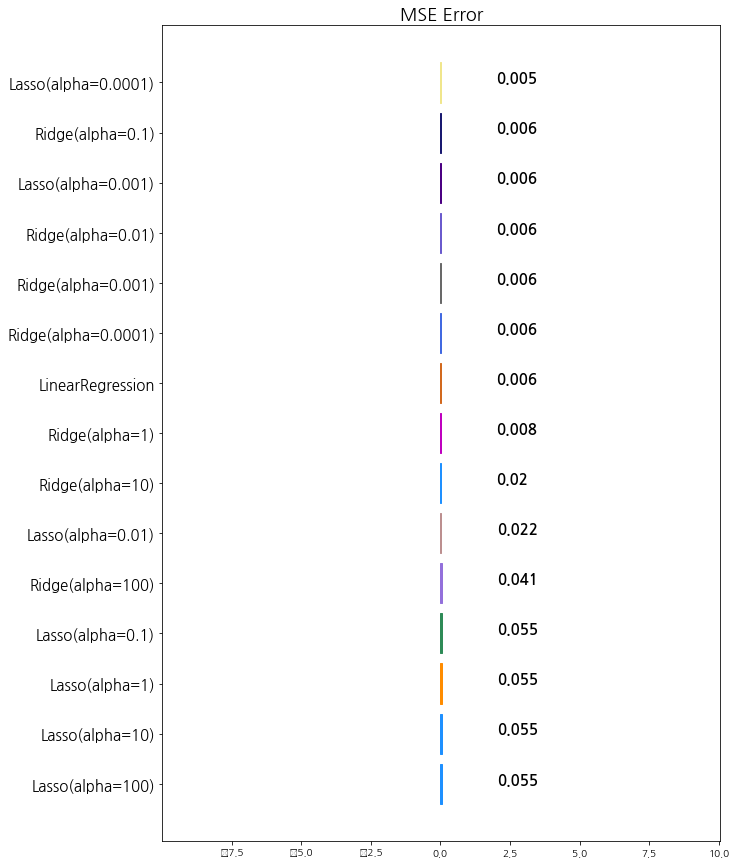

In [ ]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [ ]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

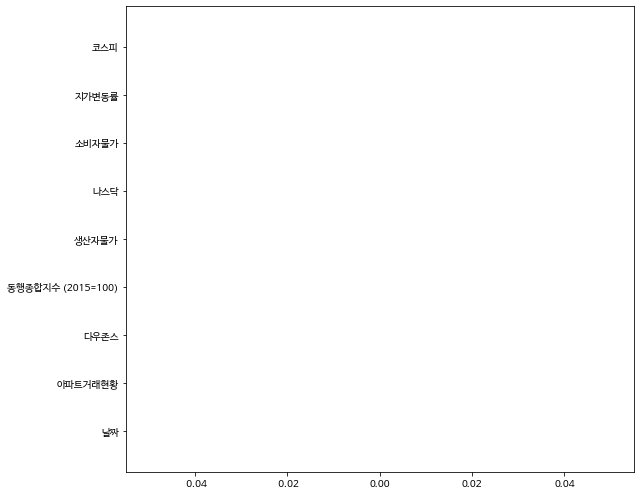

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

In [ ]:
lasso_100.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

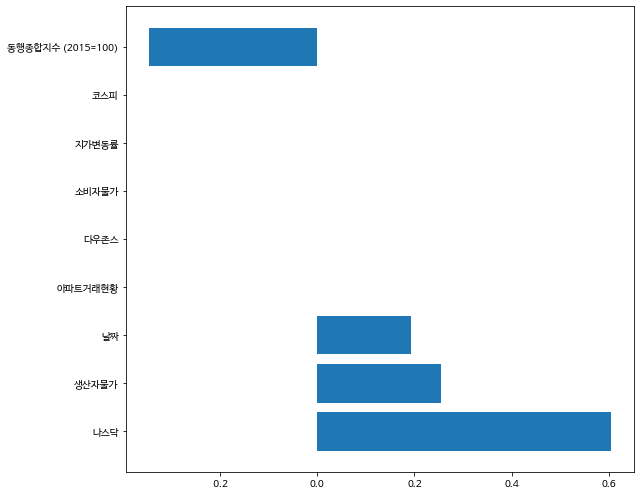

In [ ]:
plot_coef(x_train.columns, lasso_001.coef_)

In [ ]:
lasso_001.coef_

array([ 0.19198218, -0.        ,  0.        , -0.34589808,  0.25357315,
        0.60271794,  0.        , -0.        , -0.        ])